In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()

,0
Survived,0.000000
Age,0.198653
Fare,0.000000


In [5]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [8]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna()
    .sample(X_train['Age_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna()
    .sample(X_test['Age_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)



In [9]:
X_train

,Age,Fare,Age_imputed
6,54.0,51.8625,54.0
718,NaN,15.5000,24.0
685,25.0,41.5792,25.0
73,26.0,14.4542,26.0
882,22.0,10.5167,22.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,9.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


/tmp/ipython-input-10-629994495.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/tmp/ipython-input-10-629994495.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)


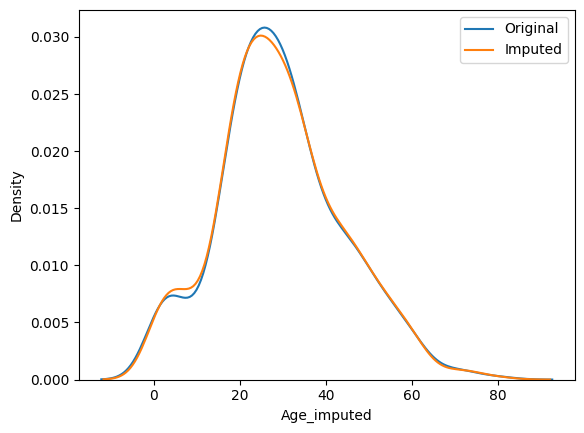

In [10]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [11]:
print('Original variance:',X_train['Age'].var())
print('Imputed variance:',X_train['Age_imputed'].var())

Original variance: 209.0174769137654
Imputed variance: 210.37173525689448


In [12]:
X_train[['Fare','Age','Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.091615,0.072568
Age,0.091615,1.000000,1.000000
Age_imputed,0.072568,1.000000,1.000000


<Axes: >

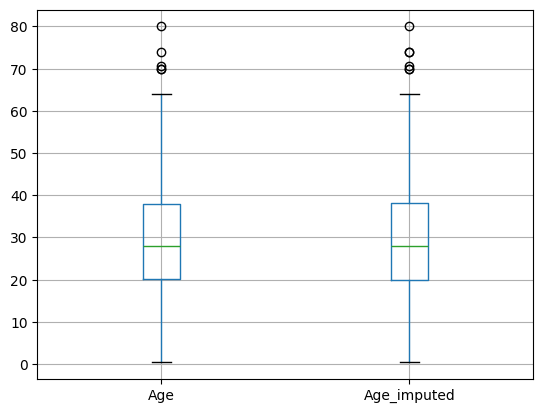

In [13]:
X_train[['Age','Age_imputed']].boxplot()

In [14]:
def impute_age(row):
    if pd.isnull(row['Age_imputed']):
        fare_value = row['Fare']
        # Handle NaN or negative Fare
        if pd.notnull(fare_value) and fare_value >= 0:
            seed = int(fare_value * 100)
        else:
            seed = 42
        return X_train['Age'].dropna().sample(1, random_state=seed).values[0]
    else:
        return row['Age_imputed']

# Apply it row-wise
X_train['Age_imputed'] = X_train.apply(impute_age, axis=1)


Categorical Data

In [17]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [18]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [21]:
X=data
y=data['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_test['GarageQual']
X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [25]:
X_train.sample()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
475,NaN,TA,132500,TA,NaN


In [26]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_train['GarageQual_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_test['GarageQual_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)

X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna()
    .sample(X_train['FireplaceQu_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['GarageQual'].dropna()
    .sample(X_test['FireplaceQu_imputed'].isnull().sum(), replace=True, random_state=42)
    .values
)


In [27]:
temp=pd.concat([X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
                X_train['GarageQual_imputed'].value_counts()/len(X_train)],axis=1)
temp.columns=['Original','Imputed']

In [28]:
temp


,Original,Imputed
TA,0.949189,0.948875
Fa,0.034595,0.032720
Gd,0.011892,0.013292
Ex,0.003243,0.004090
Po,0.001081,0.001022


In [29]:
temp=pd.concat([X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
                X_train['FireplaceQu_imputed'].value_counts()/len(X_train)],axis=1)
temp.columns=['Original','Imputed']

/tmp/ipython-input-32-3629497813.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


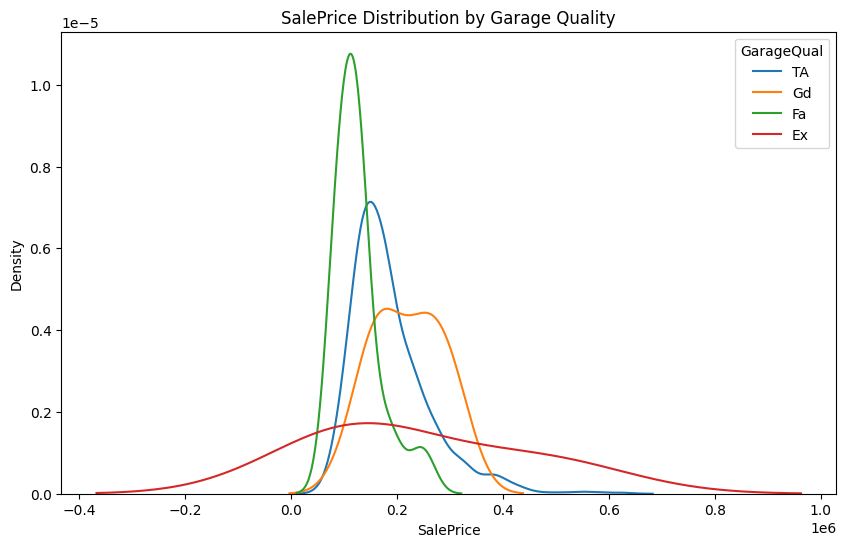

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for category in X_train['GarageQual'].dropna().unique():
    sns.kdeplot(
        data=X_train[X_train['GarageQual'] == category],
        x='SaleP rice',
        label=category,
        fill=False
    )

plt.title('SalePrice Distribution by Garage Quality')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.legend(title='GarageQual')
plt.show()


/tmp/ipython-input-33-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-33-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

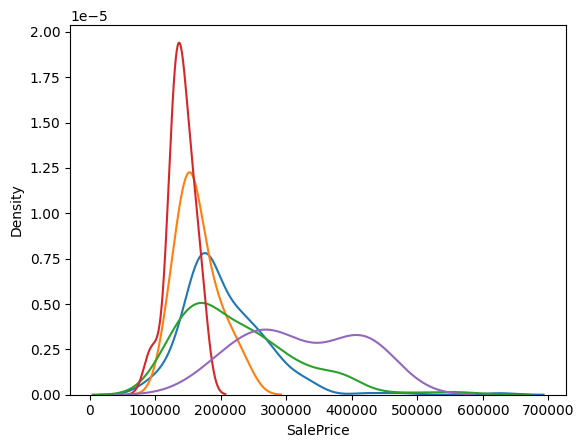

In [33]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

Missing Indicator

In [34]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [35]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [36]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
X_train.head()

,Age,Fare
6,54.0,51.8625
718,NaN,15.5000
685,25.0,41.5792
73,26.0,14.4542
882,22.0,10.5167


In [42]:
mi=MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [43]:
X_train_missing=mi.transform(X_train)

In [44]:
X_test_missing=mi.transform(X_test)

In [46]:
X_train['Age_NA']=X_train_missing
X_test['Age_NA']=X_test_missing

In [47]:
X_train

,Age,Fare,Age_NA
6,54.0,51.8625,False
718,NaN,15.5000,True
685,25.0,41.5792,False
73,26.0,14.4542,False
882,22.0,10.5167,False
...,...,...,...
106,21.0,7.6500,False
270,NaN,31.0000,True
860,41.0,14.1083,False
435,14.0,120.0000,False


In [48]:
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6508474576271186

Automatically selecting value for imputation

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [51]:
df=pd.read_csv('train.csv')

In [52]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [59]:
preprocessor=ColumnTransformer([
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,categorical_features)
])

In [71]:
clf=Pipeline(steps=[('preprocessor',preprocessor),
                    ('classifier',LogisticRegression())])

In [72]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [79]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],  # 'liblinear' supports both 'l1' and 'l2'
}


In [81]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best params:")
print(grid_search.best_params_)


Best params:
{'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [75]:
print(f"Internal CV score:{grid_search.best_score_:.3f}")

Internal CV score:0.784


In [82]:
import pandas as pd

# Create DataFrame from grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score (descending)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)

# View relevant columns (fix param names)
cv_results[
    [
        'param_classifier__C',
        'param_classifier__penalty',
        'param_classifier__solver',
        'mean_test_score'
    ]
]


,param_classifier__C,param_classifier__penalty,param_classifier__solver,mean_test_score
2,0.10,l1,liblinear,0.785068
3,0.10,l2,liblinear,0.783670
5,1.00,l2,liblinear,0.783670
4,1.00,l1,liblinear,0.783670
6,10.00,l1,liblinear,0.783670
7,10.00,l2,liblinear,0.783670
1,0.01,l2,liblinear,0.758446
0,0.01,l1,liblinear,0.623599
